
<img src="./img/escom.png" alt="escom logo" align="right" width="200"/>

# Otsu's Binarization
**Absalom Herrera Ramírez | ESCOM - IPN**

#### Imports for image loading, manipulation and display

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image

#### Using PIL to load the example image

In [2]:
filepath =  "./img/"

filename = "big_tree.jpeg"
#filename = "books.jpeg"
#filename = "computer.jpeg"
#filename = "glass.jpeg"
#filename = "lamp.jpeg"
#filename = "person.jpeg"
#filename = "sign.jpeg"
#filename = "table.jpeg"

img = Image.open(filepath+filename)

#### Converting the image to an numpy array

In [3]:
img_arr = np.asarray(img)
img_arr.shape # (height, width, channels)

(960, 1280, 3)

#### Showing the image using matplotlib

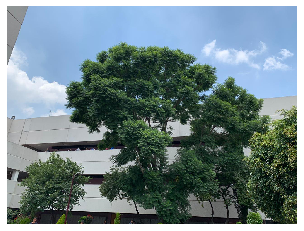

In [4]:
plt.axis("off")
plt.imshow(img_arr)

#### This function takes a colored image and shows its RGB channels and histograms

In [5]:
def three_channels_histogram(img_arr):
    # get the height and the width
    height=img_arr.shape[0]
    width=img_arr.shape[1]
    # each channel
    red_ch = img_arr.copy()
    red_ch [:, :, 1] = 0
    red_ch [:, :, 2] = 0
    green_ch = img_arr.copy()
    green_ch [:, :, 0] = 0
    green_ch [:, :, 2] = 0
    blue_ch = img_arr.copy()
    blue_ch [:, :, 0] = 0
    blue_ch [:, :, 1] = 0
    # histograms
    red_hist = np.zeros(256)
    green_hist = np.zeros(256)
    blue_hist = np.zeros(256)
    for i in range(height):
        for j in range(width):
            red_hist[red_ch[i,j,0]] += 1
            green_hist[green_ch[i,j,1]] += 1
            blue_hist[blue_ch[i,j,2]] += 1
    # showing channels
    fig, axs = plt.subplots(1, 3, figsize=(20,5), sharey=True)
    axs[0].imshow(red_ch)
    axs[0].set_xlabel("red")
    axs[0].axis("off")
    axs[1].imshow(green_ch)
    axs[1].set_xlabel("green")
    axs[1].axis("off")
    axs[2].imshow(blue_ch)
    axs[2].set_xlabel("blue")
    axs[2].axis("off")
    fig.suptitle('Image channels')
    # showing histograms for each channel
    fig, axs = plt.subplots(1, 3, figsize=(20,5))
    axs[0].plot(red_hist,color = "r")
    axs[0].set_xlabel("red")
    axs[1].plot(green_hist,color = "g")
    axs[1].set_xlabel("green")
    axs[2].plot(blue_hist,color = "b")
    axs[2].set_xlabel("blue")
    fig.suptitle('Histogram channels')
            

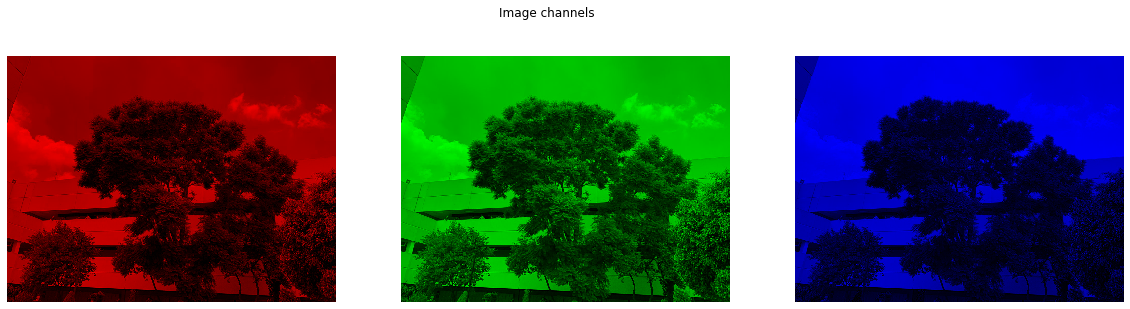

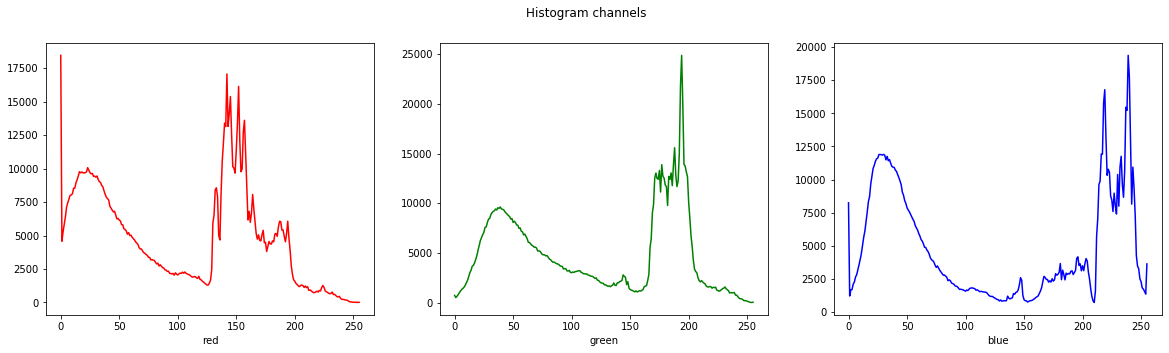

In [6]:
three_channels_histogram(img_arr)

#### Otsu's binarization works on grayscale images, so we need to grayscale the image with this function

In [7]:
def to_grayscale(img_arr):
    gray_img = img_arr.dot([.2126, .7152, .0722])
    return gray_img.astype(np.uint8)

#### Now we show the grayscale image histogram

Text(0.5, 0.98, 'Grayscale image and histogram')

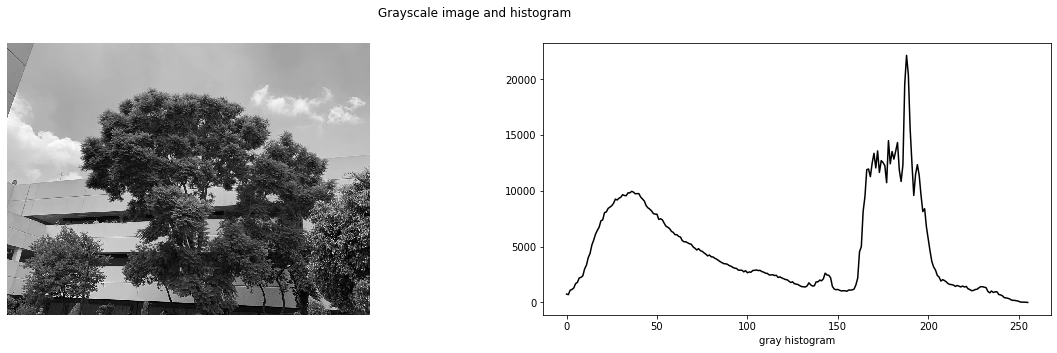

In [8]:
gray_img = to_grayscale(img_arr)
height=img_arr.shape[0]
width=img_arr.shape[1]
gray_hist = np.zeros(256)
for i in range(height):
        for j in range(width):
            gray_hist[gray_img[i,j]] += 1
            
fig, axs = plt.subplots(1, 2, figsize=(20,5))
axs[0].imshow(gray_img, cmap="gray")
axs[0].axis("off")
axs[1].plot(gray_hist, color="black")
axs[1].set_xlabel("gray histogram")
fig.suptitle('Grayscale image and histogram')

#### To use Otsu's method we need to make that histogram into a probability distribution

In [9]:
total_pixels = gray_img.shape[0] * gray_img.shape[1]
print("Image's number of pixels is:", total_pixels)
gray_hist = gray_hist / total_pixels

Image's number of pixels is: 1228800


#### Now we apply Otsu's method to find the threshold

In [10]:
def otsu (gray_hist):
    t = 0 # threshold
    maxv = 0
    maxt = 0
    for i in range(len(gray_hist)):
        t = i
        w0 = np.sum(gray_hist[0:t + 1])
        w1 = abs(1 - w0)
        m0 = 0; m1 = 0;
        for j in range(t + 1):
            m0 += j * gray_hist[j]
        if w0 != 0:
            m0 = m0 / w0
        for k in range(t + 1, len(gray_hist)):
            m1 += k * gray_hist[k]
        if w1 != 0:
            m1 = m1 / w1
        v = w0 * w1 * ((m0 - m1) ** 2)
        if v > maxv:
            maxv = v
            maxt = t
    return maxt

#### Here we plot the probability distribution and the threshold

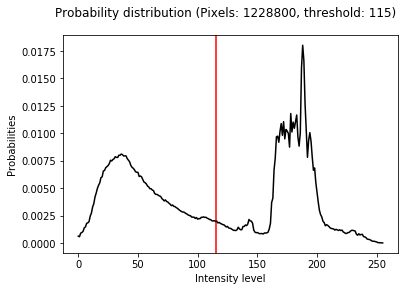

In [11]:
t = otsu(gray_hist)
plt.suptitle("Probability distribution (Pixels: " + str(total_pixels)+", threshold: "+str(t)+")")
plt.ticklabel_format(style='plain')
plt.xlabel("Intensity level")
plt.ylabel("Probabilities")
plt.axvline(x=t, color="red")
plt.plot(gray_hist, color="black")

plt.show()

#### Now that we have caculated the threshold value, we proceed to segment the image according to that threshold

In [12]:
def segment_img(gray_img):
    h = gray_img.shape[0]
    w = gray_img.shape[1]
    t_img = gray_img.copy()
    for i in range(h):
        for j in range(w):
            if (gray_img[i][j] > t):
                t_img[i][j] = 255
            else:
                t_img[i][j] = 0
    return t_img

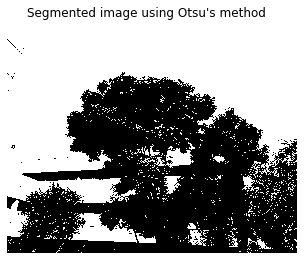

In [13]:
t_img = segment_img(gray_img)
plt.suptitle("Segmented image using Otsu's method")
plt.imshow(t_img, cmap="gray")
plt.axis("off")
plt.show()